# [1] Import Libary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf

In [3]:
dataset = pd.read_csv('biased_leukemia_dataset.csv')

# [2] EDA

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient_ID            143194 non-null  int64  
 1   Age                   143194 non-null  int64  
 2   Gender                143194 non-null  object 
 3   Country               143194 non-null  object 
 4   WBC_Count             143194 non-null  int64  
 5   RBC_Count             143194 non-null  float64
 6   Platelet_Count        143194 non-null  int64  
 7   Hemoglobin_Level      143194 non-null  float64
 8   Bone_Marrow_Blasts    143194 non-null  int64  
 9   Genetic_Mutation      143194 non-null  object 
 10  Family_History        143194 non-null  object 
 11  Smoking_Status        143194 non-null  object 
 12  Alcohol_Consumption   143194 non-null  object 
 13  Radiation_Exposure    143194 non-null  object 
 14  Infection_History     143194 non-null  object 
 15  

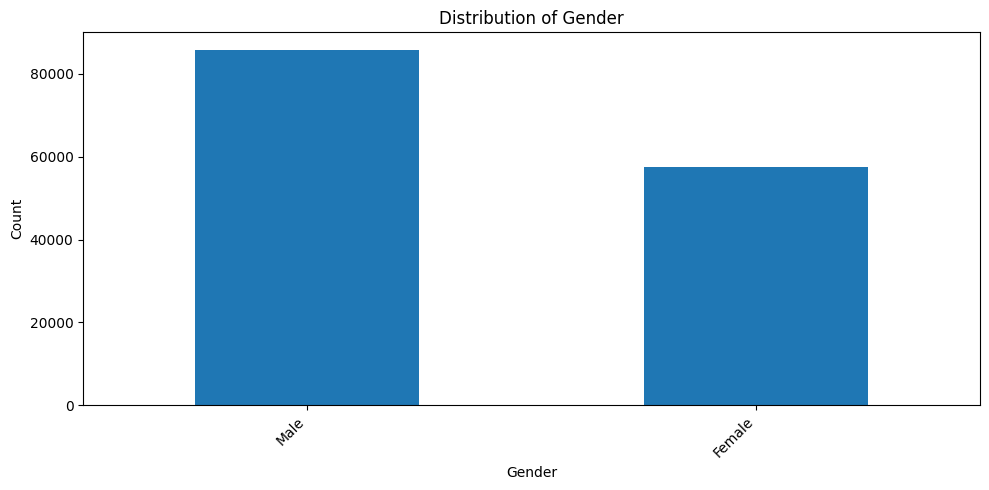

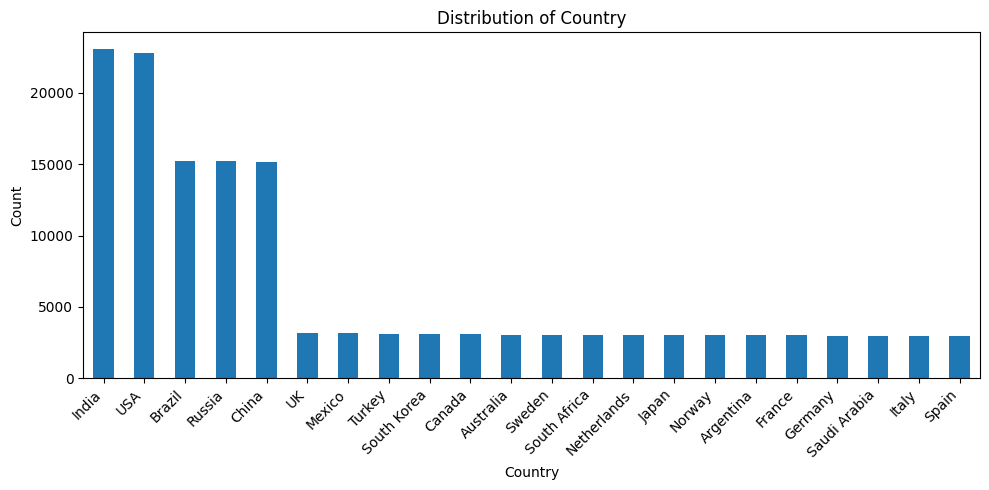

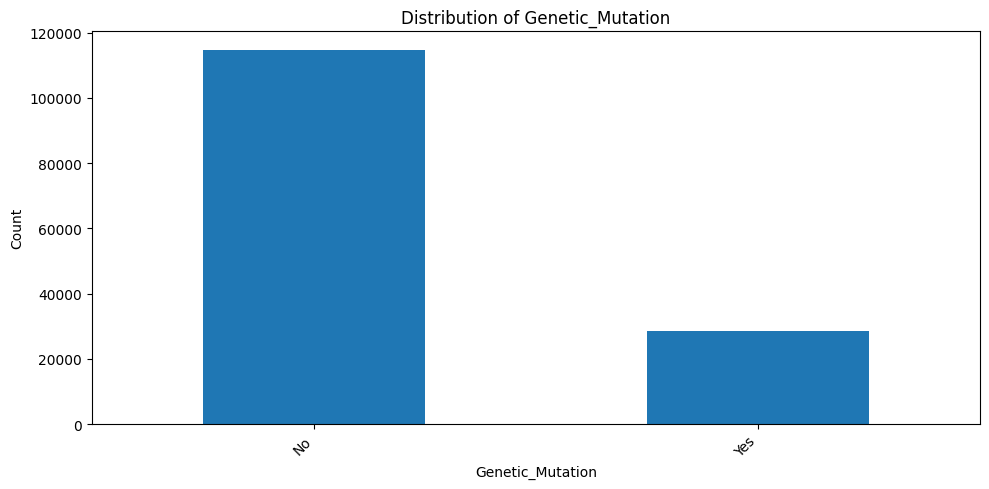

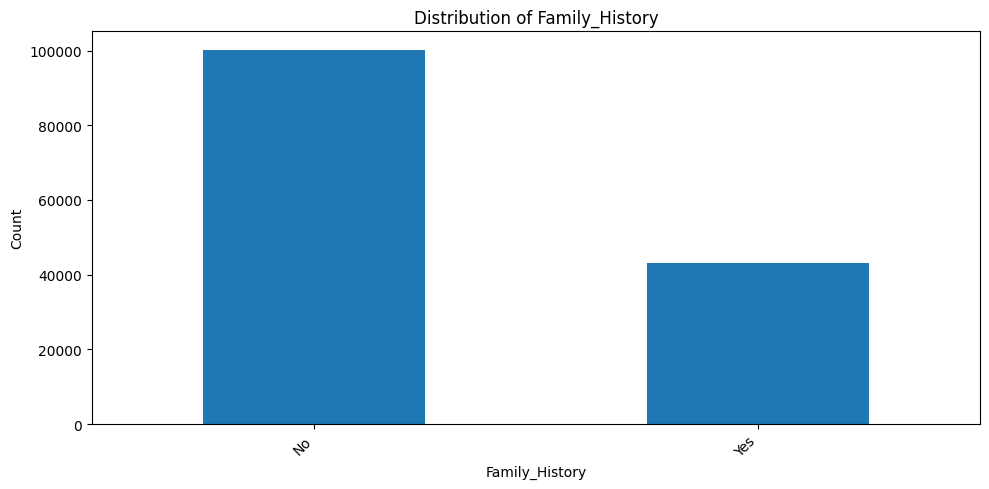

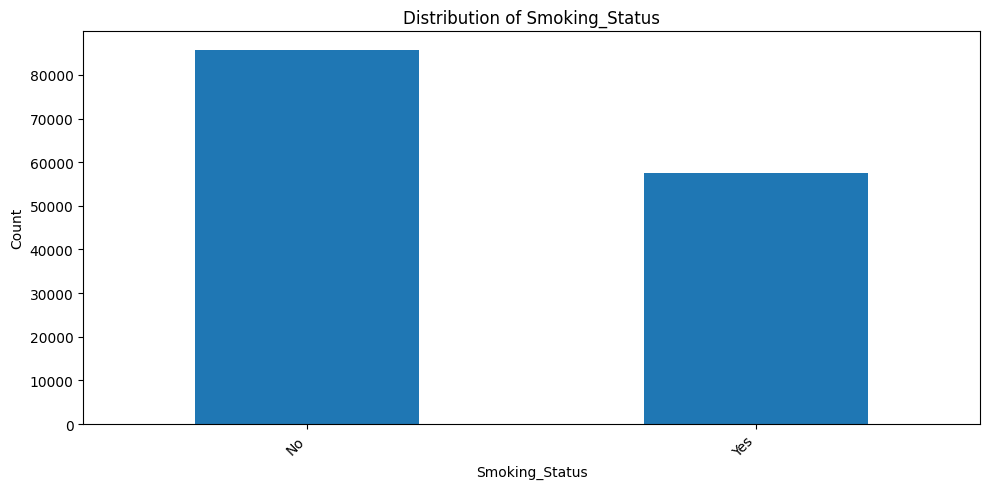

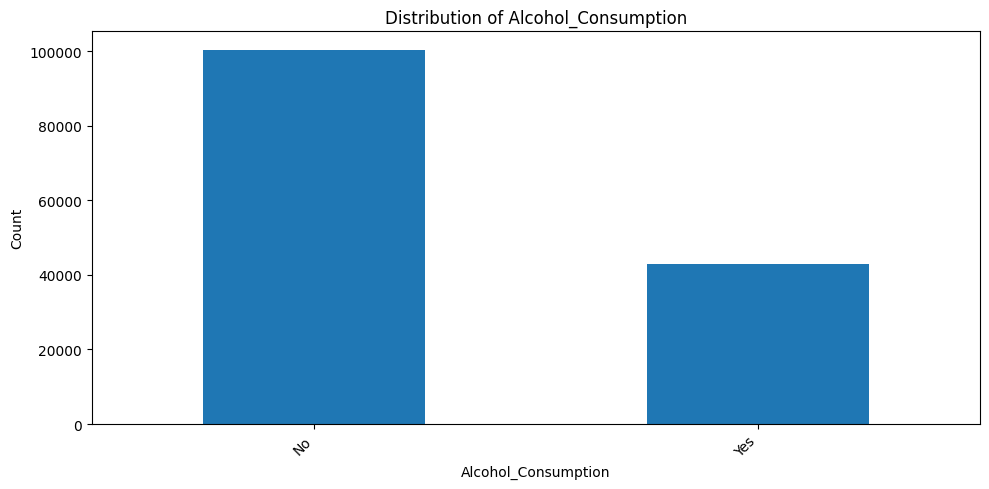

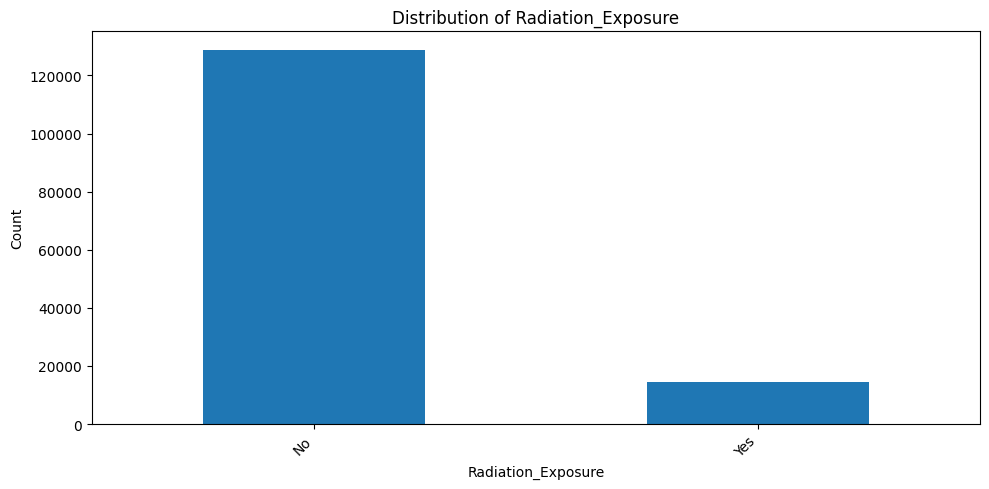

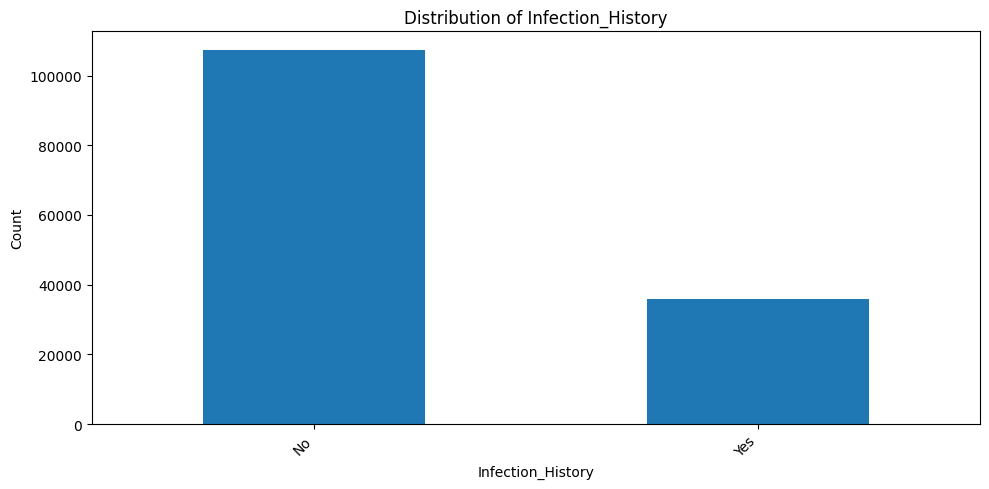

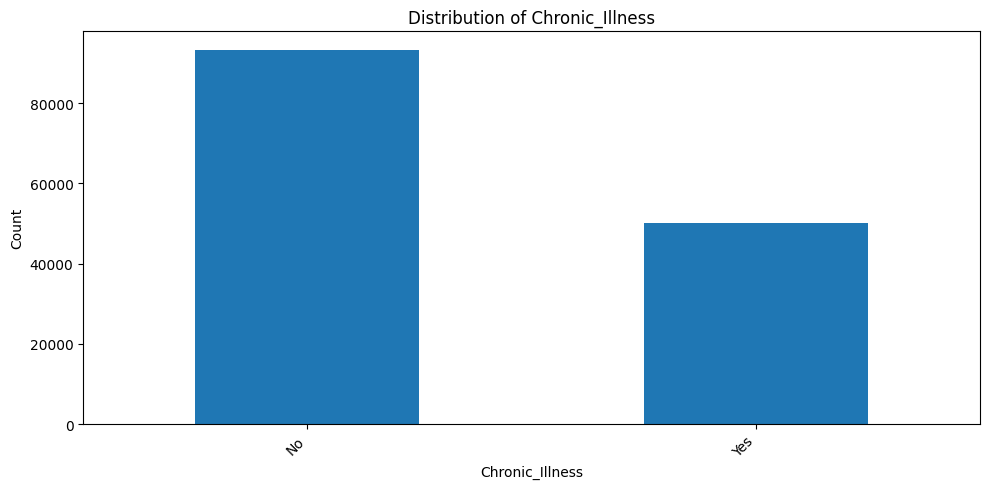

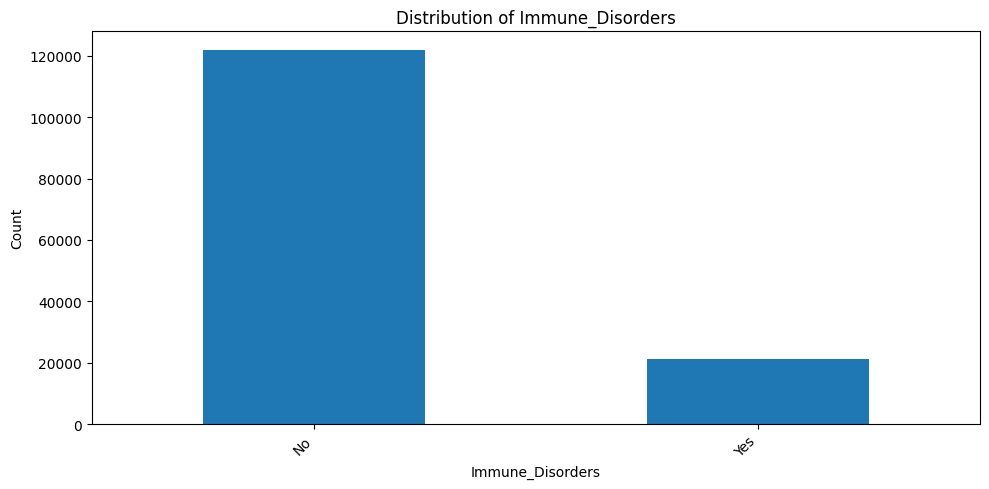

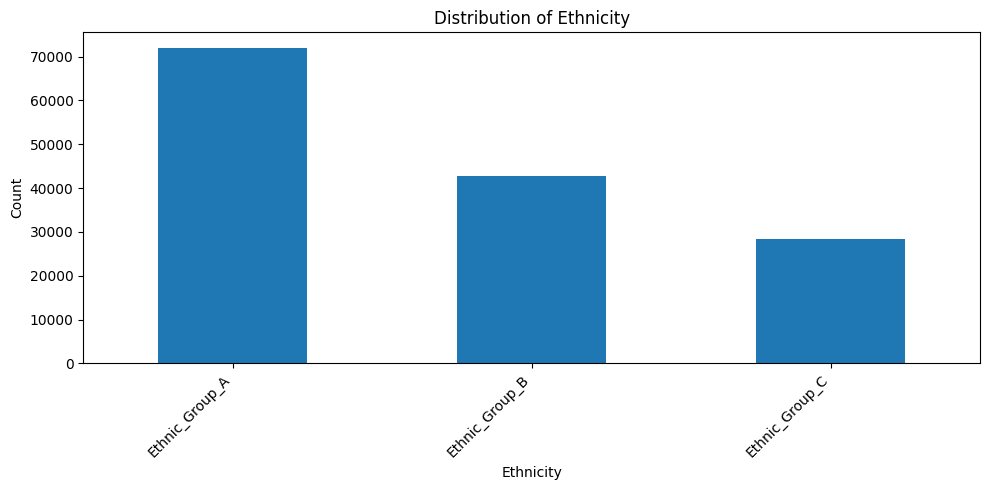

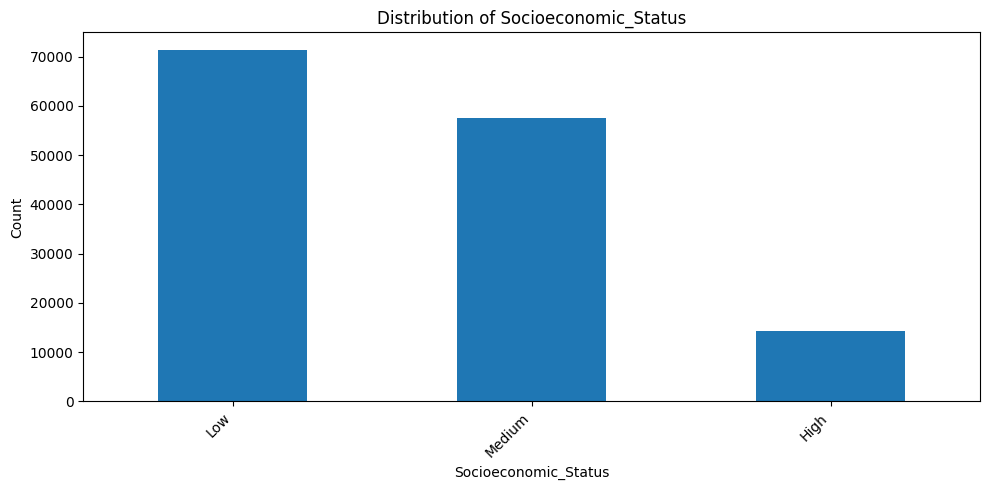

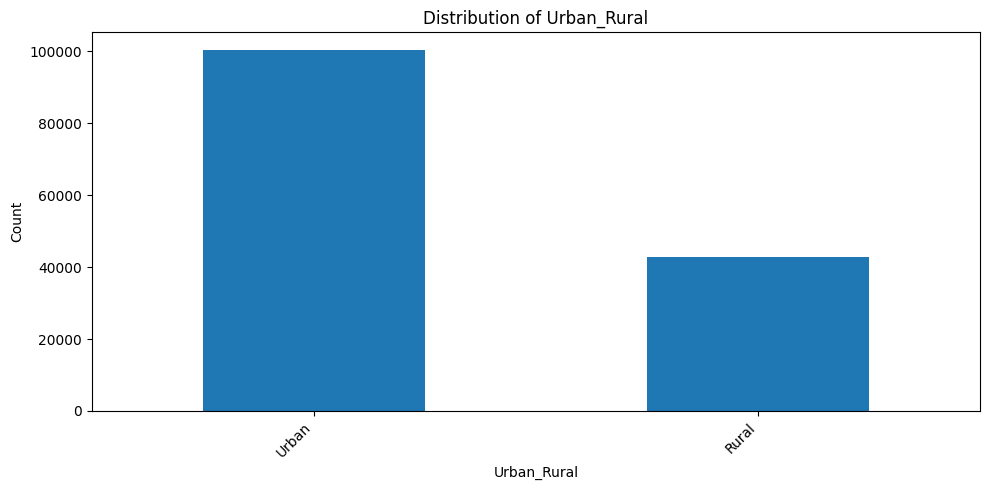

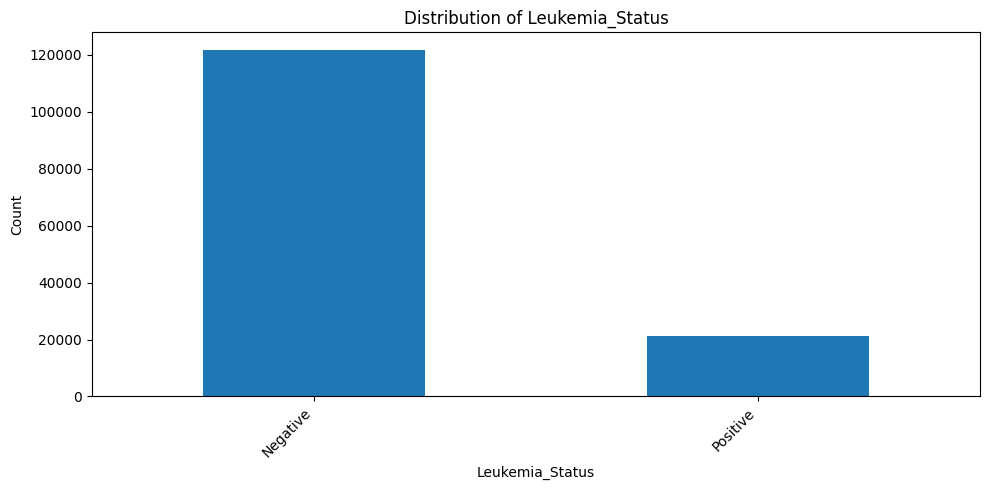

In [5]:
categorical_cols = [
    'Gender', 'Country', 'Genetic_Mutation', 'Family_History',
    'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure',
    'Infection_History', 'Chronic_Illness', 'Immune_Disorders',
    'Ethnicity', 'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status'
]

# Plot
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    dataset[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

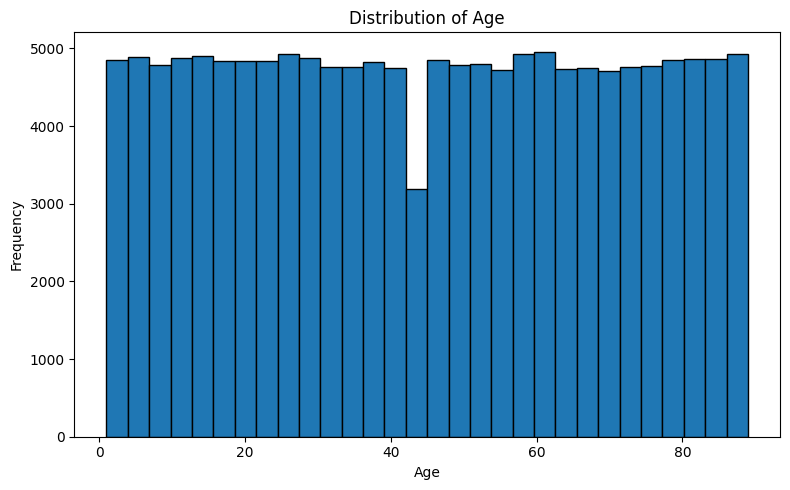

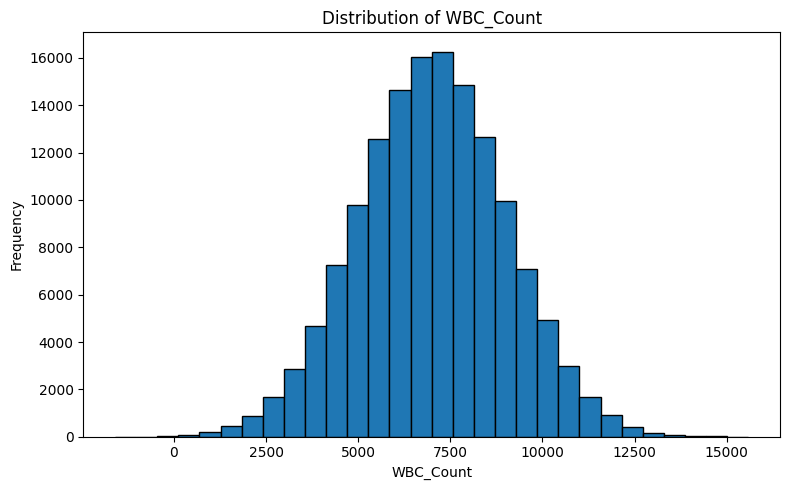

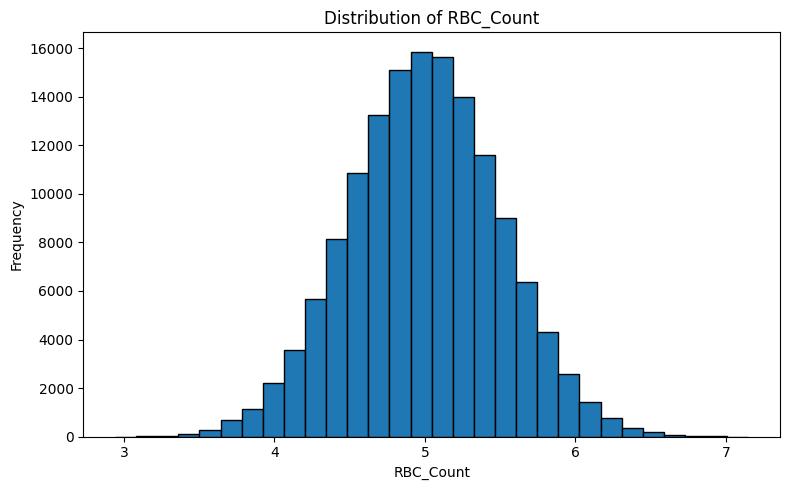

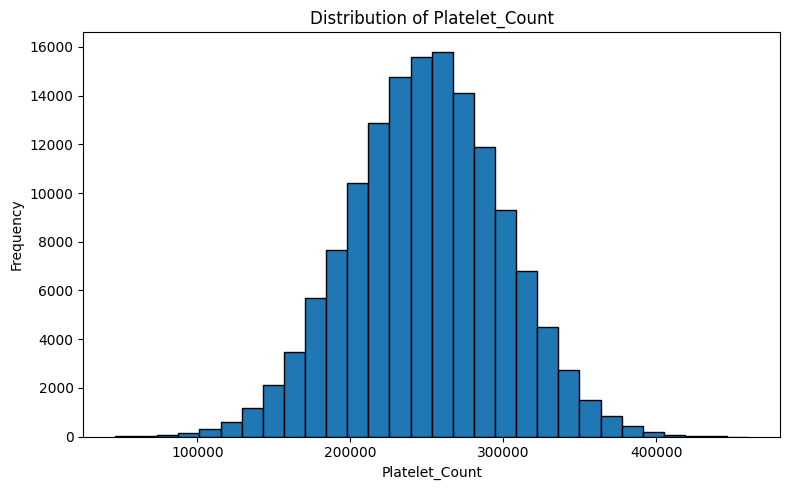

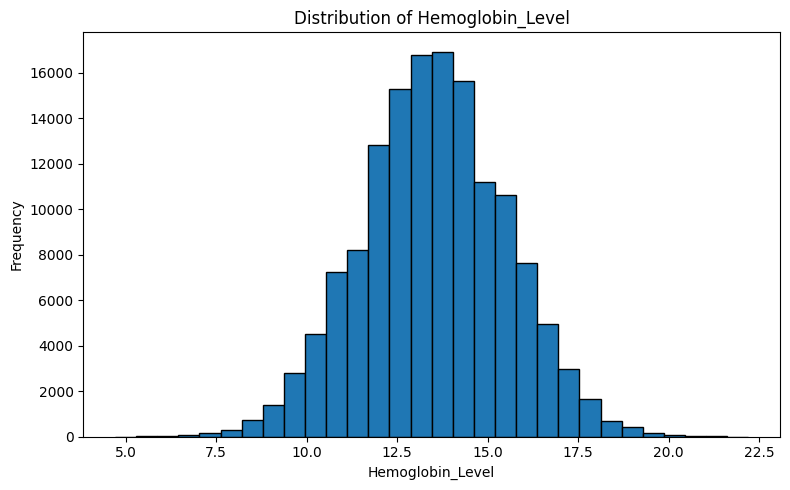

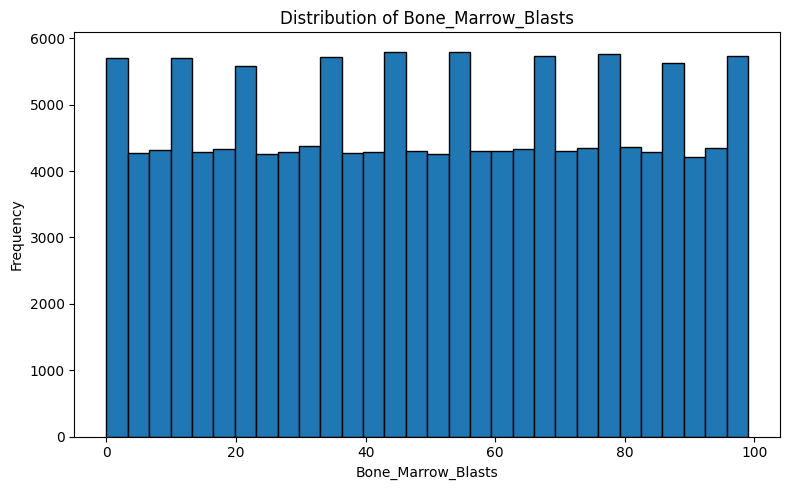

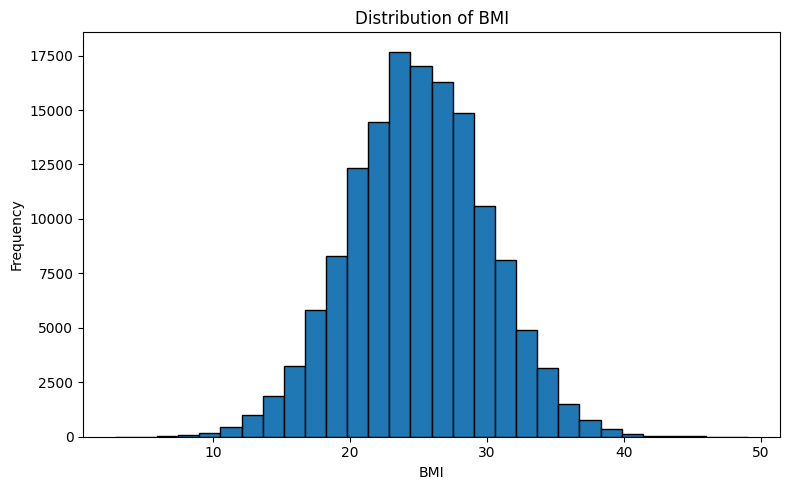

In [6]:
numeric_cols = ['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 'Hemoglobin_Level', 'Bone_Marrow_Blasts', 'BMI']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(dataset[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


# [3] Data Preprocessing

drop Patient ID

In [7]:
df = dataset.drop(['Patient_ID'], axis=1)

Check null data

In [8]:
print(df.isnull().sum())

Age                     0
Gender                  0
Country                 0
WBC_Count               0
RBC_Count               0
Platelet_Count          0
Hemoglobin_Level        0
Bone_Marrow_Blasts      0
Genetic_Mutation        0
Family_History          0
Smoking_Status          0
Alcohol_Consumption     0
Radiation_Exposure      0
Infection_History       0
BMI                     0
Chronic_Illness         0
Immune_Disorders        0
Ethnicity               0
Socioeconomic_Status    0
Urban_Rural             0
Leukemia_Status         0
dtype: int64


Encode Categorical Features with 0,1,2,,,, n-1

In [9]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Genetic_Mutation', 'Family_History', 'Smoking_Status', 
              'Alcohol_Consumption', 'Radiation_Exposure', 'Infection_History', 
              'Chronic_Illness', 'Immune_Disorders', 'Ethnicity', 'Socioeconomic_Status', 
              'Urban_Rural', 'Leukemia_Status']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-hot :)
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

In [10]:
df.shape

(143194, 41)

In [11]:
df.head()

,Age,Gender,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,...,Country_Norway,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_Turkey,Country_UK,Country_USA
0,52,1,2698,5.36,262493,12.2,72,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,15,0,4857,4.81,277877,11.9,97,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,72,1,9614,5.17,319600,13.4,94,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,61,1,6278,5.41,215200,11.6,50,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,21,1,8342,4.78,309169,14.3,28,0,0,1,...,False,False,False,False,False,False,False,False,False,False


Scale Numerical Features

In [12]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 'Hemoglobin_Level', 
            'Bone_Marrow_Blasts', 'BMI']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [13]:
df.head()

,Age,Gender,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,...,Country_Norway,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_Turkey,Country_UK,Country_USA
0,0.274104,1,-2.143673,0.723185,0.251995,-0.650238,0.778570,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,-1.163475,0,-1.068173,-0.376164,0.560650,-0.800485,1.645497,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1.051173,1,1.301515,0.343410,1.397753,-0.049248,1.541465,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0.623785,1,-0.360305,0.823125,-0.696860,-0.950732,0.015675,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,-0.930355,1,0.667871,-0.436129,1.188472,0.401494,-0.747221,0,0,1,...,False,False,False,False,False,False,False,False,False,False


train-test split

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Leukemia_Status', axis=1)
y = df['Leukemia_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Handling Class Imbalance using smote

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [16]:
# Force clean NumPy arrays
X_train_res = np.asarray(X_train_res).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train_res = np.asarray(y_train_res).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# Check shape & dtype to confirm
print("✅ X_train_res dtype:", X_train_res.dtype, X_train_res.shape)
print("✅ y_train_res dtype:", y_train_res.dtype, y_train_res.shape)



✅ X_train_res dtype: float32 (194938, 40)
✅ y_train_res dtype: float32 (194938,)



# [4] Modeling with SMOTE Data Set

ANN

In [17]:
import shutil
shutil.rmtree('tuning_dir', ignore_errors=True)


In [18]:
from keras_tuner import RandomSearch, Objective
from sklearn.metrics import f1_score, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Build model with hyperparameters
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(X_train_res.shape[1],)
    ))

    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation='relu'
        ))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Custom tuner (faster, no saving)
class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        model = self.hypermodel.build(trial.hyperparameters)
        model.fit(*args, **kwargs, verbose=0)
        val_data = kwargs['validation_data']
        y_pred = (model.predict(val_data[0]) > 0.5).astype("int32")
        f1 = f1_score(val_data[1], y_pred)
        self.oracle.update_trial(trial.trial_id, {"val_f1": f1})

# Initialize tuner
tuner = MyTuner(
    build_model,
    objective=Objective("val_f1", direction="max"),
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='leukemia_mlp'
)

# Run search
tuner.search(X_train_res, y_train_res, epochs=30, validation_data=(X_test, y_test))

# 🚀 Rebuild and train best model manually (Option 1)
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = build_model(best_hp)

best_model.fit(X_train_res, y_train_res, epochs=30, validation_data=(X_test, y_test), verbose=1)

# Evaluate
y_pred_probs = best_model.predict(X_test)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Flatten in case it's shape (N, 1)
probs = y_pred_probs.flatten()

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Limit threshold range (e.g., between 0.1 and 0.5)
mask = (thresholds >= 0.1) & (thresholds <= 0.5)
filtered_thresholds = thresholds[mask]
filtered_f1s = f1s[:-1][mask]  # f1s is one element longer than thresholds

# Get best threshold and F1 from limited range
best_thresh = filtered_thresholds[np.argmax(filtered_f1s)]
best_f1 = np.max(filtered_f1s)

print(f"\n📊 Best Threshold (0.1–0.5): {best_thresh:.3f}")
print(f"🏆 Best F1 Score at Threshold: {best_f1:.4f}")

# Predict with best threshold
y_pred = (y_pred_probs > best_thresh).astype("int32")

# Report
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))

print("\n✅ Best Hyperparameters:")
for param, val in best_hp.values.items():
    print(f"{param}: {val}")


Trial 10 Complete [00h 03m 18s]
val_f1: 0.16689182167723163

Best val_f1 So Far: 0.1799772899318698
Total elapsed time: 00h 33m 17s
Epoch 1/30
6092/6092 [==============================] - 7s 1ms/step - loss: 0.6489 - accuracy: 0.6136 - val_loss: 0.6619 - val_accuracy: 0.6406
Epoch 2/30
6092/6092 [==============================] - 7s 1ms/step - loss: 0.5658 - accuracy: 0.7037 - val_loss: 0.5904 - val_accuracy: 0.7443
Epoch 3/30
6092/6092 [==============================] - 7s 1ms/step - loss: 0.5290 - accuracy: 0.7185 - val_loss: 0.5814 - val_accuracy: 0.7471
Epoch 4/30
6092/6092 [==============================] - 7s 1ms/step - loss: 0.5174 - accuracy: 0.7228 - val_loss: 0.5593 - val_accuracy: 0.7499
Epoch 5/30
6092/6092 [==============================] - 7s 1ms/step - loss: 0.5120 - accuracy: 0.7289 - val_loss: 0.5658 - val_accuracy: 0.7302
Epoch 6/30
6092/6092 [==============================] - 7s 1ms/step - loss: 0.5085 - accuracy: 0.7314 - val_loss: 0.5745 - val_accuracy: 0.7147
Epoc

Random Forest

Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Hyperparameters from Random Search:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

📊 Best Threshold: 0.302
🏆 Best F1 Score at Threshold: 0.2328

✅ Accuracy: 0.4899

✅ Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.49      0.62     24328
         1.0       0.15      0.51      0.23      4311

    accuracy                           0.49     28639
   macro avg       0.50      0.50      0.43     28639
weighted avg       0.74      0.49      0.56     28639



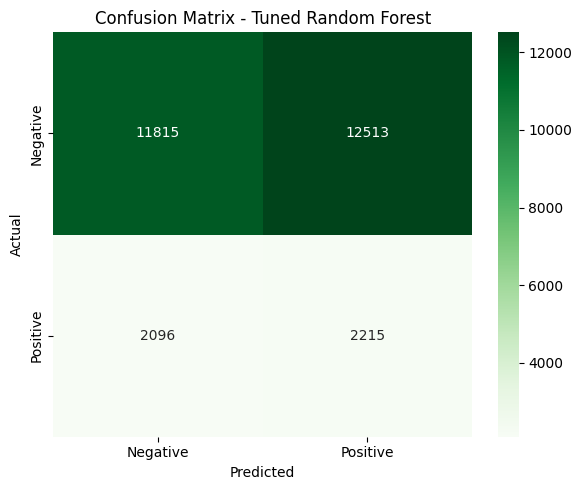


✅ ROC-AUC Score: 0.4973


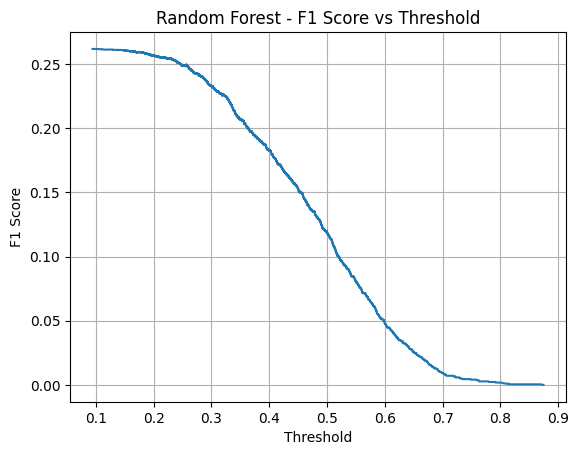

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [37]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    precision_recall_curve,
)

# 2. Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# 3. Stratified K-Fold (to keep class balance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Initialize Random Forest with class weight
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 5. Run Randomized Search
rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rs.fit(X_train_res, y_train_res)

# 6. Best parameters
print("✅ Best Hyperparameters from Random Search:")
print(rs.best_params_)

# 7. Predict probabilities
best_rf = rs.best_estimator_
y_proba = best_rf.predict_proba(X_test)[:, 1]

# 8. Threshold tuning based on F1
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Filter thresholds in desired range
valid_mask = (thresholds >= 0.3) & (thresholds <= 0.7)
filtered_thresholds = thresholds[valid_mask]
filtered_f1s = f1s[:-1][valid_mask]  # align shape

if len(filtered_f1s) > 0:
    best_thresh = filtered_thresholds[np.argmax(filtered_f1s)]
    best_f1 = np.max(filtered_f1s)
else:
    print("⚠️ No thresholds in the selected range produced valid F1 scores. Using default threshold = 0.5.")
    best_thresh = 0.5
    best_f1 = f1_score(y_test, (y_proba > 0.5).astype("int32"))



print(f"\n📊 Best Threshold: {best_thresh:.3f}")
print(f"🏆 Best F1 Score at Threshold: {best_f1:.4f}")

# 9. Predict using best threshold
y_pred = (y_proba > best_thresh).astype("int32")

# 10. Evaluate
print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# 11. Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.tight_layout()
plt.show()

# 12. ROC-AUC
roc = roc_auc_score(y_test, y_proba)
print(f"\n✅ ROC-AUC Score: {roc:.4f}")

# 13. F1 vs Threshold plot
plt.plot(thresholds, f1s[:-1])
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Random Forest - F1 Score vs Threshold")
plt.grid(True)
plt.show()

# 14. Feature Importance
importances = pd.Series(best_rf.feature_importances_, index=X_train_res.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,6))
plt.title('Top 20 Feature Importances (Tuned RF)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


TabNet

In [ ]:
import optuna
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_curve, f1_score,
    classification_report, confusion_matrix
)

# Use a smaller sample of training data for tuning (e.g. 50%)
sample_size = int(0.5 * len(X_train_res))
indices = np.random.choice(len(X_train_res), sample_size, replace=False)
X_sample = X_train_res[indices]
y_sample = y_train_res[indices]

# Convert DataFrames to NumPy (if needed)
X_sample_np = X_sample.values if hasattr(X_sample, 'values') else X_sample
y_sample_np = y_sample.values if hasattr(y_sample, 'values') else y_sample
X_val_np = X_test.values if hasattr(X_test, 'values') else X_test
y_val_np = y_test.values if hasattr(y_test, 'values') else y_test

# Ensure numeric arrays
X_train_np = X_train_res.values if hasattr(X_train_res, 'values') else X_train_res
y_train_np = y_train_res.values if hasattr(y_train_res, 'values') else y_train_res
X_val_np = X_test.values if hasattr(X_test, 'values') else X_test
y_val_np = y_test.values if hasattr(y_test, 'values') else y_test

# Optuna objective
def objective(trial):
    print(f"\n🔍 Trial {trial.number}")

    try:
        lr = trial.suggest_float('lr', 1e-3, 0.05, log=True)
        params = {
            'n_d': trial.suggest_categorical('n_d', [8, 16, 32]),
            'n_a': trial.suggest_categorical('n_a', [8, 16, 32]),
            'n_steps': trial.suggest_int('n_steps', 3, 8),
            'gamma': trial.suggest_float('gamma', 1.0, 2.0),
            'lambda_sparse': trial.suggest_float('lambda_sparse', 1e-5, 1e-2, log=True),
            'optimizer_params': {"lr": lr},
            'seed': 42,
            'verbose': 0,
            'device_name': 'cuda'
        }

        model = TabNetClassifier(**params)
        model.fit(
            X_train=X_sample_np, y_train=y_sample_np,
            eval_set=[(X_val_np, y_val_np)],
            eval_metric=['balanced_accuracy'],
            max_epochs=50,         # Reduced from 100
            patience=5,            # Faster early stopping
            batch_size=1024,
            virtual_batch_size=128
        )

        # Predict and find best threshold
        probs = model.predict_proba(X_val_np)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y_val_np, probs)
        f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
        best_f1 = np.max(f1s)
        best_thresh = thresholds[np.argmax(f1s)]

        print(f"✅ F1 = {best_f1:.4f} at threshold = {best_thresh:.3f}")
        return best_f1

    except Exception as e:
        print(f"❌ Trial failed: {e}")
        raise e

# Run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # Reduced from 20

# Best hyperparameters
print("\n✅ Best Trial Hyperparameters:")
for k, v in study.best_trial.params.items():
    print(f"{k}: {v}")

# 🧪 Final model trained on FULL dataset
best = study.best_trial.params
final_model = TabNetClassifier(
    n_d=best['n_d'], n_a=best['n_a'], n_steps=best['n_steps'],
    gamma=best['gamma'], lambda_sparse=best['lambda_sparse'],
    optimizer_params={'lr': best['lr']},
    seed=42, verbose=1, device_name='cuda'
)

final_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_metric=['balanced_accuracy'],
    max_epochs=50,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128
)




[I 2025-05-05 17:47:33,653] A new study created in memory with name: no-name-713cb3db-6186-49fb-80e1-f048f4fae46b



🔍 Trial 0

Early stopping occurred at epoch 5 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.50285


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:48:16,699] Trial 0 finished with value: 0.2618157480039318 and parameters: {'lr': 0.0011514202902113955, 'n_d': 32, 'n_a': 16, 'n_steps': 6, 'gamma': 1.222340855762269, 'lambda_sparse': 1.9244442889056495e-05}. Best is trial 0 with value: 0.2618157480039318.


✅ F1 = 0.2618 at threshold = 0.045

🔍 Trial 1

Early stopping occurred at epoch 11 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.50363


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:49:30,651] Trial 1 finished with value: 0.26204214517800584 and parameters: {'lr': 0.01294118568570971, 'n_d': 8, 'n_a': 16, 'n_steps': 6, 'gamma': 1.3803759873411678, 'lambda_sparse': 0.0014524370176917858}. Best is trial 1 with value: 0.26204214517800584.


✅ F1 = 0.2620 at threshold = 0.188

🔍 Trial 2

Early stopping occurred at epoch 9 with best_epoch = 4 and best_val_0_balanced_accuracy = 0.50169


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:50:15,202] Trial 2 finished with value: 0.2622577645405486 and parameters: {'lr': 0.006289959722630362, 'n_d': 32, 'n_a': 16, 'n_steps': 4, 'gamma': 1.2261068275968414, 'lambda_sparse': 0.008559109341690527}. Best is trial 2 with value: 0.2622577645405486.


✅ F1 = 0.2623 at threshold = 0.137

🔍 Trial 3

Early stopping occurred at epoch 7 with best_epoch = 2 and best_val_0_balanced_accuracy = 0.50992


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:51:05,017] Trial 3 finished with value: 0.2622099907886308 and parameters: {'lr': 0.0343005837819428, 'n_d': 8, 'n_a': 16, 'n_steps': 6, 'gamma': 1.3726997018603673, 'lambda_sparse': 2.8216146563908056e-05}. Best is trial 2 with value: 0.2622577645405486.


✅ F1 = 0.2622 at threshold = 0.304

🔍 Trial 4

Early stopping occurred at epoch 13 with best_epoch = 8 and best_val_0_balanced_accuracy = 0.50479


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:52:05,864] Trial 4 finished with value: 0.262109324036565 and parameters: {'lr': 0.0044758317296534995, 'n_d': 8, 'n_a': 16, 'n_steps': 4, 'gamma': 1.112377049996982, 'lambda_sparse': 1.4759833361657945e-05}. Best is trial 2 with value: 0.2622577645405486.


✅ F1 = 0.2621 at threshold = 0.190

🔍 Trial 5

Early stopping occurred at epoch 8 with best_epoch = 3 and best_val_0_balanced_accuracy = 0.50208


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:52:46,874] Trial 5 finished with value: 0.261791232880871 and parameters: {'lr': 0.037776304588405994, 'n_d': 8, 'n_a': 16, 'n_steps': 4, 'gamma': 1.566671689673293, 'lambda_sparse': 0.0002992682271706314}. Best is trial 2 with value: 0.2622577645405486.


✅ F1 = 0.2618 at threshold = 0.177

🔍 Trial 6

Early stopping occurred at epoch 6 with best_epoch = 1 and best_val_0_balanced_accuracy = 0.50336


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:53:31,703] Trial 6 finished with value: 0.26181066228125993 and parameters: {'lr': 0.027291838733742267, 'n_d': 16, 'n_a': 16, 'n_steps': 6, 'gamma': 1.7613353835943872, 'lambda_sparse': 0.003356461956173768}. Best is trial 2 with value: 0.2622577645405486.


✅ F1 = 0.2618 at threshold = 0.208

🔍 Trial 7

Early stopping occurred at epoch 5 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.503


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:54:05,104] Trial 7 finished with value: 0.2618606183350052 and parameters: {'lr': 0.011085721360251733, 'n_d': 8, 'n_a': 32, 'n_steps': 5, 'gamma': 1.6232277044839794, 'lambda_sparse': 0.0011819642797673796}. Best is trial 2 with value: 0.2622577645405486.


✅ F1 = 0.2619 at threshold = 0.346

🔍 Trial 8

Early stopping occurred at epoch 5 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.50442


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:54:44,172] Trial 8 finished with value: 0.26171518644246167 and parameters: {'lr': 0.01631999354302631, 'n_d': 32, 'n_a': 8, 'n_steps': 6, 'gamma': 1.0037983326830955, 'lambda_sparse': 0.006636018199878665}. Best is trial 2 with value: 0.2622577645405486.


✅ F1 = 0.2617 at threshold = 0.214

🔍 Trial 9

Early stopping occurred at epoch 8 with best_epoch = 3 and best_val_0_balanced_accuracy = 0.50518


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-05 17:55:32,041] Trial 9 finished with value: 0.2618380911375812 and parameters: {'lr': 0.0151084064339476, 'n_d': 32, 'n_a': 16, 'n_steps': 5, 'gamma': 1.9743784412506744, 'lambda_sparse': 2.248801094076758e-05}. Best is trial 2 with value: 0.2622577645405486.


✅ F1 = 0.2618 at threshold = 0.194

✅ Best Trial Hyperparameters:
lr: 0.006289959722630362
n_d: 32
n_a: 16
n_steps: 4
gamma: 1.2261068275968414
lambda_sparse: 0.008559109341690527


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.71923 | val_0_balanced_accuracy: 0.49931 |  0:00:07s
epoch 1  | loss: 0.66588 | val_0_balanced_accuracy: 0.49661 |  0:00:15s
epoch 2  | loss: 0.6437  | val_0_balanced_accuracy: 0.49848 |  0:00:23s
epoch 3  | loss: 0.60286 | val_0_balanced_accuracy: 0.49679 |  0:00:30s
epoch 4  | loss: 0.55219 | val_0_balanced_accuracy: 0.49924 |  0:00:38s
epoch 5  | loss: 0.53398 | val_0_balanced_accuracy: 0.50045 |  0:00:45s
epoch 6  | loss: 0.52546 | val_0_balanced_accuracy: 0.50167 |  0:00:53s
epoch 7  | loss: 0.52195 | val_0_balanced_accuracy: 0.49809 |  0:01:01s
epoch 8  | loss: 0.52    | val_0_balanced_accuracy: 0.49862 |  0:01:08s
epoch 9  | loss: 0.51935 | val_0_balanced_accuracy: 0.50114 |  0:01:16s
epoch 10 | loss: 0.51613 | val_0_balanced_accuracy: 0.49831 |  0:01:24s
epoch 11 | loss: 0.51519 | val_0_balanced_accuracy: 0.49751 |  0:01:31s

Early stopping occurred at epoch 11 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.50167


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


NameError: name 'model' is not defined

In [35]:
# 📈 Final evaluation

# --- Predict probabilities ---
final_probs = final_model.predict_proba(X_val_np)[:, 1]

# --- Calculate precision-recall-threshold values ---
precisions, recalls, thresholds = precision_recall_curve(y_val_np, final_probs)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# --- Restrict threshold range to 0.3–0.7 ---
valid_idx = np.where((thresholds >= 0.3) & (thresholds <= 0.7))[0]
if len(valid_idx) == 0:
    print("⚠️ No thresholds found in range 0.3–0.7, falling back to full range.")
    best_thresh = thresholds[np.argmax(f1s)]
else:
    best_thresh = thresholds[valid_idx[np.argmax(f1s[valid_idx])]]

print(f"\n🏁 Final Best Threshold (0.3–0.7 range): {best_thresh:.3f}")

# --- Predict using best threshold ---
final_preds = (final_probs > best_thresh).astype(int)

# --- Evaluation ---
print("\n✅ Final Classification Report:")
print(classification_report(y_val_np, final_preds))
print("✅ Final Accuracy:", round(accuracy_score(y_val_np, final_preds), 4))

print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_val_np, final_preds))


🏁 Final Best Threshold (0.3–0.7 range): 0.300

✅ Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.43      0.57     24328
         1.0       0.15      0.58      0.24      4311

    accuracy                           0.45     28639
   macro avg       0.50      0.50      0.40     28639
weighted avg       0.75      0.45      0.52     28639

✅ Final Accuracy: 0.4501

✅ Confusion Matrix:
[[10408 13920]
 [ 1829  2482]]
